#Download the necessary libraries

In [ ]:
!pip install networkx

#import the important libraries

In [ ]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
from sklearn.preprocessing import RobustScaler  # For robust data scaling
from scipy.stats import mstats  # For statistical operations
from sklearn.preprocessing import LabelEncoder  # For label encoding
from sklearn.preprocessing import StandardScaler  # For standard data scaling
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import accuracy_score, precision_score, recall_score  # For model evaluation metrics
import networkx as nx  # For creating and analyzing graphs
import matplotlib.pyplot as plt  # For plotting
from matplotlib.animation import FuncAnimation  # For creating animations
from IPython.display import HTML  # For displaying HTML content


#read the data set using pandas

In [ ]:
# 6463b4d76523a3d511aadcdd9df378ec
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/charvibannur/gtfs-traffic-prediction-dataset")

Skipping, found downloaded files in "./gtfs-traffic-prediction-dataset" (use force=True to force download)


In [ ]:
df=pd.read_csv("/content/gtfs-traffic-prediction-dataset/GTFS_Data.csv")

#explore the data set

In [ ]:
df.head(20)

,stop_id_from,stop_id_to,trip_id,arrival_time,time,speed,Number_of_trips,SRI,Degree_of_congestion
0,36156,38709,NORMAL_333_Pune Station To Hinjawadi Maan Pha...,09:13:54,0.027222,14.479565,9.0,-0.40816322,Very smooth
1,36156,38709,NORMAL_115P_Pune Station to Hinjawadi Phase 3_...,09:03:01,0.032222,12.232736,9.0,1.2068965,Smooth
2,36156,38709,NORMAL_100_Ma Na Pa to Hinjawadi Maan Phase 3_...,09:15:00,0.058333,6.757130,9.0,5.142857,Heavy congestion
3,36156,38709,NORMAL_VJR5_Ma Na Pa To Mukai Chowk_Up-0905_0,09:05:00,0.033611,11.727251,9.0,1.570248,Smooth
4,36156,38709,NORMAL_100_Ma Na Pa to Hinjawadi Maan Phase 3_...,09:00:00,0.058333,6.757130,9.0,5.142857,Heavy congestion
5,36156,38709,NORMAL_208_Hadapsar Gadital To Hinjawadi Maan ...,09:11:47,0.040556,9.719160,9.0,3.0136988,Mild congestion
6,36156,38709,NORMAL_36_Ma Na Pa To Chinchwadgaon_Up-0900_0,09:00:00,0.037222,10.589532,9.0,2.3880599,Smooth
7,36156,38709,NORMAL_36_Ma Na Pa To Chinchwadgaon_Up-0910_0,09:10:00,0.037222,10.589532,9.0,2.3880599,Smooth
8,36156,38709,NORMAL_204_Bhekrainagar To Chinchwad Gaon_Up-0...,09:14:25,0.043889,8.980996,9.0,3.544304,Mild congestion
9,38709,2321,NORMAL_87_Deccan Gymkhana To Sutarwadi Pashan ...,09:16:41,0.023889,24.774636,22.0,2.906977,Mild congestion


#print the shape of  data before the preprocessing

In [ ]:
df.shape

(66913, 9)

#print information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66913 entries, 0 to 66912
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   stop_id_from          66913 non-null  int64  
 1   stop_id_to            66913 non-null  int64  
 2   trip_id               66913 non-null  object 
 3   arrival_time          66644 non-null  object 
 4   time                  66913 non-null  float64
 5   speed                 66655 non-null  float64
 6   Number_of_trips       66912 non-null  float64
 7   SRI                   66600 non-null  object 
 8   Degree_of_congestion  66913 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 4.6+ MB


#describe the data


In [ ]:
df.describe()

,stop_id_from,stop_id_to,time,speed,Number_of_trips
count,66913.000000,66913.000000,66913.000000,6.665500e+04,66912.000000
mean,33078.882683,33096.450286,0.044127,inf,16.566236
std,11893.792935,11873.818983,0.737762,NaN,18.882254
min,386.000000,386.000000,0.000000,0.000000e+00,1.000000
25%,33494.000000,33496.000000,0.009444,2.168910e+01,4.000000
50%,38784.000000,38785.000000,0.015000,3.148695e+01,9.000000
75%,39280.000000,39284.000000,0.024444,4.145599e+01,23.000000
max,40516.000000,40516.000000,23.998611,inf,141.000000


#start preporocessing the Dataset

#print the classes before encoding

In [ ]:
df['Degree_of_congestion'].unique()

array(['Very smooth', 'Smooth', 'Heavy congestion', 'Mild congestion'],
      dtype=object)

#Encode the catigorical features in our target

In [ ]:
label_encoder = LabelEncoder()
df['Degree_of_congestion'] = label_encoder.fit_transform(df['Degree_of_congestion'])

#print the classes after encoding

In [ ]:
df['Degree_of_congestion'].unique()

array([3, 2, 0, 1])

# Count the occurrences of unique labels

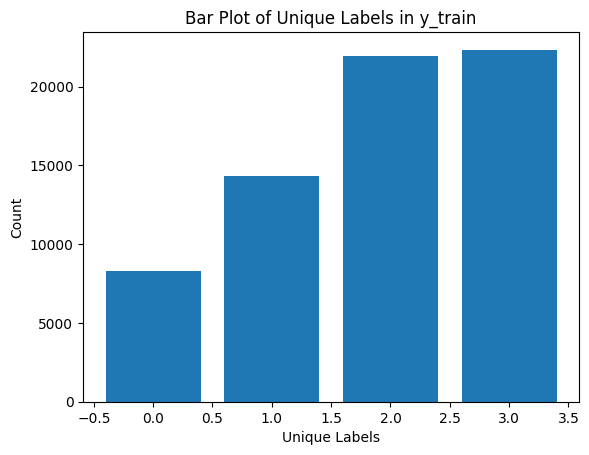

In [ ]:
unique_labels, label_counts = np.unique(df['Degree_of_congestion'], return_counts=True)

# Create a bar plot
plt.bar(unique_labels, label_counts)

# Add labels and title
plt.xlabel('Unique Labels')
plt.ylabel('Count')
plt.title('Bar Plot of Unique Labels in y_train')

# Show the plot
plt.show()


##So the data in not balanaced

#take from each class 8000 samples to make the data balanced

In [ ]:
# Set the random seed for reproducibility
seed_value = 42
df_sampled = pd.DataFrame()

# Iterate over unique values in "Degree_of_congestion"
for category in df["Degree_of_congestion"].unique():
    # Get 8000 random samples from each category
    category_samples = df[df["Degree_of_congestion"] == category].sample(8000, random_state=seed_value)

    # Append the sampled data to the new dataframe
    df_sampled = pd.concat([df_sampled, category_samples])

# Shuffle the dataframe to mix the samples from different categories
df_sampled = df_sampled.sample(frac=1, random_state=seed_value).reset_index(drop=True)


In [ ]:
df_sampled["Degree_of_congestion"].value_counts()
df=df_sampled

#check the data after balancing

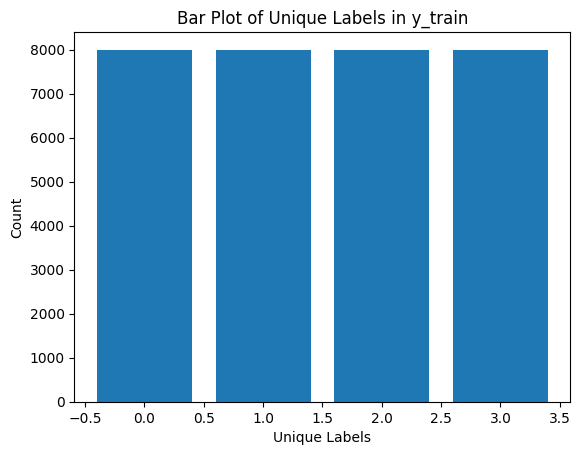

In [ ]:
unique_labels, label_counts = np.unique(df['Degree_of_congestion'], return_counts=True)

# Create a bar plot
plt.bar(unique_labels, label_counts)

# Add labels and title
plt.xlabel('Unique Labels')
plt.ylabel('Count')
plt.title('Bar Plot of Unique Labels in y_train')

# Show the plot
plt.show()


# Filter the dataframe to include only rows where the count is greater or equal than 20 trips with the same trip_id

In [ ]:
import pandas as pd

value_counts = df["trip_id"].value_counts()

df_filtered = df[df["trip_id"].isin(value_counts[value_counts >= 20].index)]
df=df_filtered

# Drop 'arrival_time' column because we use the time column which is the important column for consider the time features.

In [ ]:
df = df.drop(columns=['arrival_time'])



# Process 'time' column to make it wiht acceptable format eg. 0.027 become 27

In [ ]:

df['time'] = df['time'].apply(lambda x: round(x * 1000))  # Multiply by 1000 and round for better representation


## Remove rows with large values or infinity and fill the NAN .

In [ ]:
df.fillna(df.mean(), inplace=True)

numeric_columns = df.select_dtypes(include=[np.number]).columns
df = df[(np.abs(df[numeric_columns]) < np.inf).all(axis=1)]
df = df.fillna(df.mean())  # Fill with mean values


<ipython-input-19-dfbe5b4ff0f7>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)
<ipython-input-19-dfbe5b4ff0f7>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())  # Fill with mean values


#define our features and our target

In [ ]:
X = df[['stop_id_from', 'stop_id_to', 'time','speed','Number_of_trips']]
y = df['Degree_of_congestion']


# Scale and normalize the features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#the data become kindof small so we apply Augmentation for better training

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy={0: 15000, 1: 15000, 2: 15000, 3: 15000}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (15000) in class 0 will be larger than the number of samples in the majority class (class #1 -> 354)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (15000) in class 1 will be larger than the number of samples in the majority class (class #1 -> 354)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (15000) in class 2 will be larger than the number of samples in the majority class (class #1 -> 354)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (15000) in class 3 will be larger than the number of samples in the majority class (class #1 -> 354)
  warnings.warn(


In [ ]:

# Convert X_resampled and y_resampled to DataFrames
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df["degree_of_congestion"] = y_resampled


In [ ]:
resampled_df.head()

,stop_id_from,stop_id_to,time,speed,Number_of_trips,degree_of_congestion
0,0.551492,0.493619,1.192247,-0.078955,-1.116034,2
1,0.096323,0.005465,0.037887,-0.014207,-0.652029,2
2,0.414572,0.432705,-0.603424,-0.005375,1.482394,1
3,-0.184975,0.118952,-1.308866,1.593880,-0.605628,0
4,0.438493,0.436496,0.422673,-0.074246,-0.837631,2


#print th shape of the data after preprocessing steps

In [ ]:
resampled_df.shape

(60000, 6)

#save data after preprocessing steps into CSV file

In [ ]:
resampled_df.to_csv('pre-processed Data.csv', index=False)



# Split the data into training and testing sets

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=101)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(42000, 5)
(18000, 5)


#Start Modeling

# Initialize classifiers

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create instances of the classifiers
rf_classifier = RandomForestClassifier(random_state=55)
xgb_classifier = XGBClassifier(random_state=55)
cat_boost_classifier = CatBoostClassifier(random_state=55)
dt_classifier = DecisionTreeClassifier(random_state=55)

# Create a list of classifiers for iteration

In [ ]:
classifiers = [rf_classifier, xgb_classifier , dt_classifier]#,cat_boost_classifier]


# Train and evaluate each classifier

In [ ]:
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')

    # Print results
    classifier_name = classifier.__class__.__name__
    print(f"{classifier_name} Results:")
    print(f"Accuracy: {accuracy:.5f}")
    print(f"Precision: {precision:.5f}")
    print(f"Recall: {recall:.5f}")
    print()


RandomForestClassifier Results:
Accuracy: 0.98822
Precision: 0.98822
Recall: 0.98822

XGBClassifier Results:
Accuracy: 0.96778
Precision: 0.96778
Recall: 0.96778

DecisionTreeClassifier Results:
Accuracy: 0.95839
Precision: 0.95839
Recall: 0.95839



##Examine the confusion matrix to understand how model is performing in terms of true positives, true negatives, false positives, and false negatives

#calculate the F1 score

RandomForestClassifier Results:
F1 Score: 0.98822



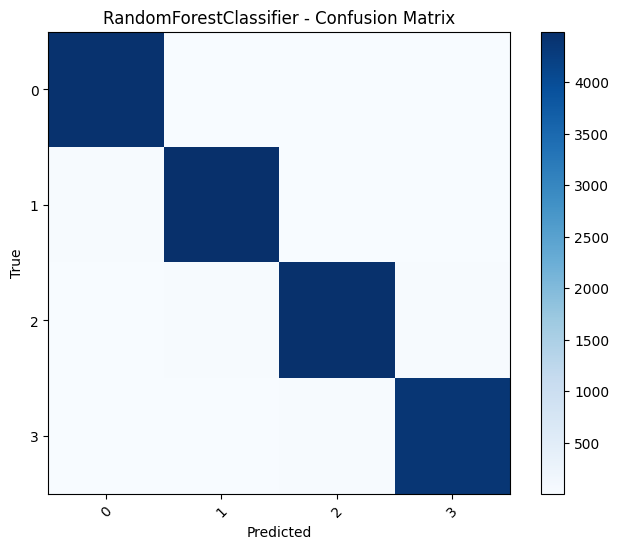

XGBClassifier Results:
F1 Score: 0.96778



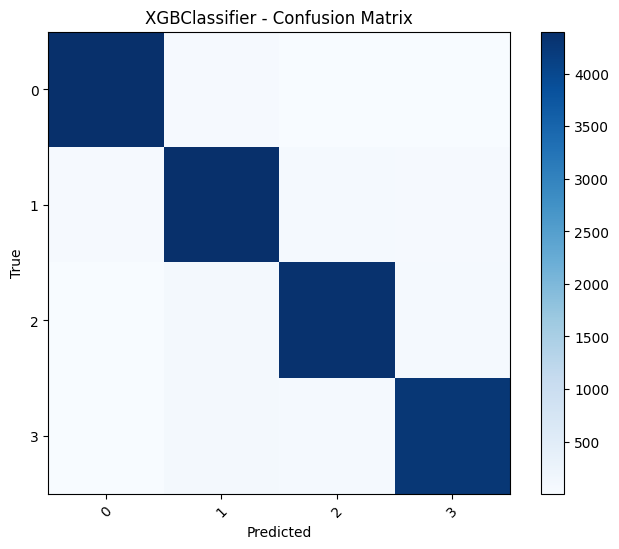

DecisionTreeClassifier Results:
F1 Score: 0.95839



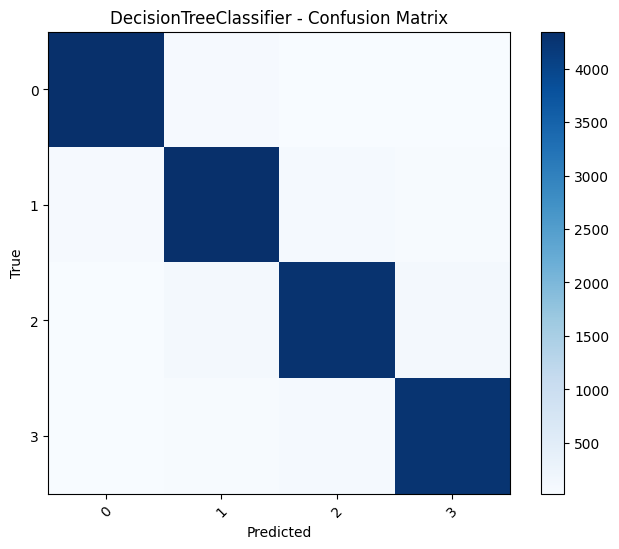

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# train list of classifiers called 'classifiers'
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='micro')
    # Print results
    classifier_name = classifier.__class__.__name__
    print(f"{classifier_name} Results:")
    print(f"F1 Score: {f1:.5f}")
    print()
    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{classifier_name} - Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(unique_labels))
    plt.xticks(tick_marks, unique_labels, rotation=45)
    plt.yticks(tick_marks, unique_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


#cross-Validation
##Ensure that model's accuracy is not due to overfitting. we will Perform cross-validation to evaluate its performance on different subsets of data. Common methods will be used include k-fold cross-validation and stratified sampling.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def cross_validation(model, _X, _y, _cv=5):
    '''Function to perform 5 Folds Cross-Validation
    Parameters
    ----------
    model: Python Class, default=None
        This is the machine learning algorithm to be used for training.
    _X: array
        This is the matrix of features.
    _y: array
        This is the target variable.
    _cv: int, default=5
        Determines the number of folds for cross-validation.
    Returns
    -------
    The function returns a dictionary containing the metrics 'accuracy', 'precision',
    'recall', 'f1' for both training set and validation set.
    '''
    _scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    results = cross_validate(estimator=model,
                             X=_X,
                             y=_y,
                             cv=_cv,
                             scoring=_scoring,
                             return_train_score=True)

    return {"Training Accuracy scores": results['train_accuracy'],
            "Mean Training Accuracy": results['train_accuracy'].mean()*100,
            "Training Precision scores": results['train_precision_macro'],
            "Mean Training Precision": results['train_precision_macro'].mean(),
            "Training Recall scores": results['train_recall_macro'],
            "Mean Training Recall": results['train_recall_macro'].mean(),
            "Training F1 scores": results['train_f1_macro'],
            "Mean Training F1 Score": results['train_f1_macro'].mean(),
            "Validation Accuracy scores": results['test_accuracy'],
            "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
            "Validation Precision scores": results['test_precision_macro'],
            "Mean Validation Precision": results['test_precision_macro'].mean(),
            "Validation Recall scores": results['test_recall_macro'],
            "Mean Validation Recall": results['test_recall_macro'].mean(),
            "Validation F1 scores": results['test_f1_macro'],
            "Mean Validation F1 Score": results['test_f1_macro'].mean()
            }


In [ ]:
from sklearn.model_selection import cross_validate
cross_validation(cat_boost_classifier, X_train, y_train,_cv=5)

#Real-world Testing
##Test model in real-world conditions to assess its performance.

#We will represent the city using graphs, and the nodes will indicate road intersections

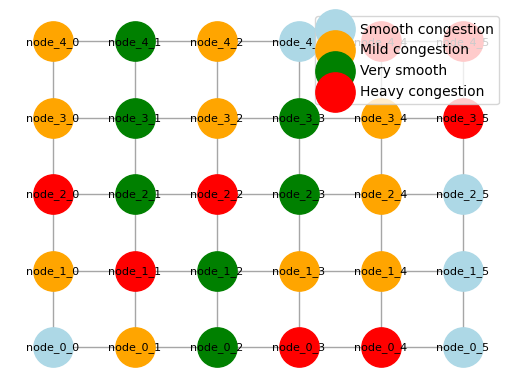

In [ ]:
# Select the first 30 rows from X_test
subset_X_test = X_test[:30]

# Make predictions on the subset_X_test using random forest
rf_predictions = rf_classifier.predict(subset_X_test)

# Create a NetworkX graph to represent the Roads
G = nx.Graph()

# Define the dimensions of the grid
num_rows = 5
num_cols = 6

# Create nodes in a grid pattern
for row in range(num_rows):
    for col in range(num_cols):
        node_name = f"node_{row}_{col}"
        G.add_node(node_name, pos=(col, -row))

# Add the nodes based on predictions
for i, prediction in enumerate(rf_predictions):
    node_name = f"node_{i // num_cols}_{i % num_cols}"
    G.nodes[node_name]['congestion_class'] = prediction

# Add edges that represent roads to connect nodes in the grid
for row in range(num_rows):
    for col in range(num_cols):
        current_node_name = f"node_{row}_{col}"
        if row > 0:
            neighbor_node_name = f"node_{row - 1}_{col}"
            G.add_edge(current_node_name, neighbor_node_name)
        if col > 0:
            neighbor_node_name = f"node_{row}_{col - 1}"
            G.add_edge(current_node_name, neighbor_node_name)

# Define colors for each congestion class
class_colors = {
    0: 'lightblue',  # Smooth congestion
    1: 'orange',      # Mild congestion
    2: 'green',     # Very smooth
    3: 'red'         # Heavy congestion
}

# Create a position dictionary for node positions
pos = {node: (col, -row) for node, (col, row) in nx.get_node_attributes(G, 'pos').items()}

# Visualize nodes with different colors based on their congestion class
for congestion_class, color in class_colors.items():
    nodes = [node for node, data in G.nodes(data=True) if data.get('congestion_class') == congestion_class]
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=color, node_size=800)

# Draw edges and labels
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1, alpha=0.7, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8)

# Add legend and set axis off
plt.legend(["Smooth congestion", "Mild congestion", "Very smooth", "Heavy congestion"])
plt.axis('off')

# Display the graph
plt.show()



#make presentation for the performace
##the model is performing well, so we consider real time visulization

#for real time presentation

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import random

# Randomly select 30 values from X_test

In [ ]:

subset_X_test_indices = random.sample(range(len(X_test)), 30)
subset_X_test = X_test[subset_X_test_indices]

# Make predictions on the subset_X_test using random forest classifer (caues the higher accurcy with RF )


In [ ]:
rf_predictions = rf_classifier.predict(subset_X_test)

#Build the graph

In [ ]:
G = nx.Graph()
num_rows = 6
num_cols = 5
for row in range(num_rows):
    for col in range(num_cols):
        node_name = f"road_{row}_{col}"
        G.add_node(node_name, congestion_class=None)
        if row > 0:
            G.add_edge(node_name, f"road_{row-1}_{col}")
        if col > 0:
            G.add_edge(node_name, f"road_{row}_{col-1}")


#Define the Classes to detect

In [ ]:

pos = {f"road_{row}_{col}": (col, -row) for row in range(num_rows) for col in range(num_cols)}

frames = []
num_frames = 8

class_colors = {
    0: 'lightblue',  # Smooth congestion
    1: 'orange',      # Mild congestion
    2: 'green',       # Very smooth
    3: 'red'          # Heavy congestion
}


#Drow the graph

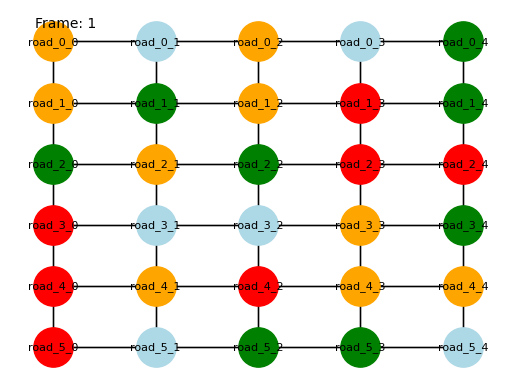

In [ ]:
fig, ax = plt.subplots()
plt.title("Traffic Congestion Classes")
def update(frame):
    ax.clear()

    nodes_list = list(G.nodes)
    random.shuffle(nodes_list)

    for i, node in enumerate(nodes_list):
        # Randomly assign predictions to each node for each frame
        G.nodes[node]['congestion_class'] = random.choice(rf_predictions) % 4

    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1, alpha=0.7, ax=ax)

    for congestion_class, color in class_colors.items():
        nodes = [node for node in G.nodes if G.nodes[node]['congestion_class'] == congestion_class]
        nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=color, node_size=800, ax=ax)

    ax.text(0.05, 0.95, f'Frame: {frame + 1}', transform=ax.transAxes)

ani = FuncAnimation(fig, update, frames=num_frames, repeat=False)
HTML(ani.to_html5_video())
